In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)
# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

import os

#✅ 비주력상품(전체데이터로 분석)
- 1회 구매, 2회 이상 구매 나누지 않은 파일로 분석진행함.

In [ ]:
df =pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/other_categories.parquet')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,5,furniture,living_room,sofa,None,Tuesday
1,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,5,computers,notebook,None,None,Tuesday
2,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01,5,computers,desktop,None,None,Tuesday
3,2019-10-01 00:00:10+00:00,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01,5,apparel,shoes,keds,None,Tuesday
4,2019-10-01 00:00:16+00:00,view,13500240,2053013557099889147,furniture.bedroom.bed,brw,93.18,555446365,7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4,2019-10-01,5,furniture,bedroom,bed,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98131528,2020-03-31 18:59:58+00:00,view,100172862,2232732114124538702,apparel.shoes,rooman,71.82,626088076,77472822-64b5-4000-a1e3-b757b4244466,2020-03-31,23,apparel,shoes,None,None,Tuesday
98131529,2020-03-31 18:59:58+00:00,view,7202279,2232732084546306225,furniture.living_room.chair,None,9.52,634136524,f0d03600-507a-4f26-b4e0-67aa1fa2c6c2,2020-03-31,23,furniture,living_room,chair,None,Tuesday
98131530,2020-03-31 18:59:58+00:00,view,9200473,2232732104343421549,apparel.scarf,ritmix,7.00,630903806,267c010f-8dbd-4cd4-8816-f4ffea502d73,2020-03-31,23,apparel,scarf,None,None,Tuesday
98131531,2020-03-31 18:59:59+00:00,view,15500139,2232732108319621820,apparel.underwear,flight,73.36,517441190,ac227671-933a-43f8-b057-f70df41f2dd7,2020-03-31,23,apparel,underwear,None,None,Tuesday


## ⏰ event_time UTC기준 -> GMT +5(중동 시간대)로 변경

In [ ]:
# ① 문자열이면 datetime으로 변환 (UTC 기준)
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)

# ② GMT+5로 시간대 변환 (Etc/GMT-5 = GMT+5)
df['event_time'] = df['event_time'].dt.tz_convert('Etc/GMT-5')

# ③ 시간대 정보 제거 → datetime64[ns]로 변환 (시분초 포함)
df['event_time'] = df['event_time'].dt.tz_localize(None)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 05:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,5,furniture,living_room,sofa,None,Tuesday
1,2019-10-01 05:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,5,computers,notebook,None,None,Tuesday
2,2019-10-01 05:00:05,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01,5,computers,desktop,None,None,Tuesday
3,2019-10-01 05:00:10,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01,5,apparel,shoes,keds,None,Tuesday
4,2019-10-01 05:00:16,view,13500240,2053013557099889147,furniture.bedroom.bed,brw,93.18,555446365,7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4,2019-10-01,5,furniture,bedroom,bed,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98131528,2020-03-31 23:59:58,view,100172862,2232732114124538702,apparel.shoes,rooman,71.82,626088076,77472822-64b5-4000-a1e3-b757b4244466,2020-03-31,23,apparel,shoes,None,None,Tuesday
98131529,2020-03-31 23:59:58,view,7202279,2232732084546306225,furniture.living_room.chair,None,9.52,634136524,f0d03600-507a-4f26-b4e0-67aa1fa2c6c2,2020-03-31,23,furniture,living_room,chair,None,Tuesday
98131530,2020-03-31 23:59:58,view,9200473,2232732104343421549,apparel.scarf,ritmix,7.00,630903806,267c010f-8dbd-4cd4-8816-f4ffea502d73,2020-03-31,23,apparel,scarf,None,None,Tuesday
98131531,2020-03-31 23:59:59,view,15500139,2232732108319621820,apparel.underwear,flight,73.36,517441190,ac227671-933a-43f8-b057-f70df41f2dd7,2020-03-31,23,apparel,underwear,None,None,Tuesday


## 🚩비주력 상품 이벤트 비율 확인하기(event_type = view, cart, purchase)

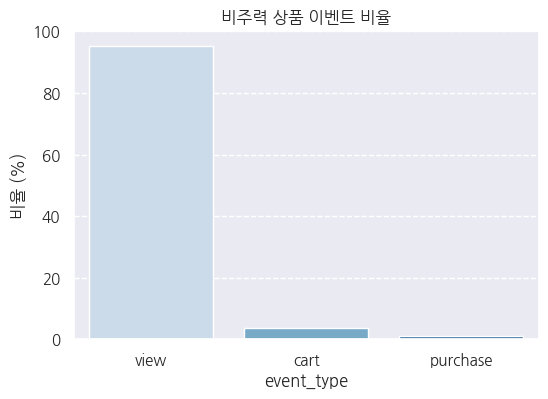

In [ ]:
event_counts = df['event_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='Blues')
plt.title('비주력 상품 이벤트 비율')
plt.ylabel('비율 (%)')
plt.grid(axis='y', linestyle='--')
plt.show()

📌해석
- 비율 확인 시 view가 압도적으로 많음 -> 어떤 카테고리에 많이 머무는지 보면 좋을 것 같음

## 🚩비주력 상품 카테고리별 구매율 확인하기

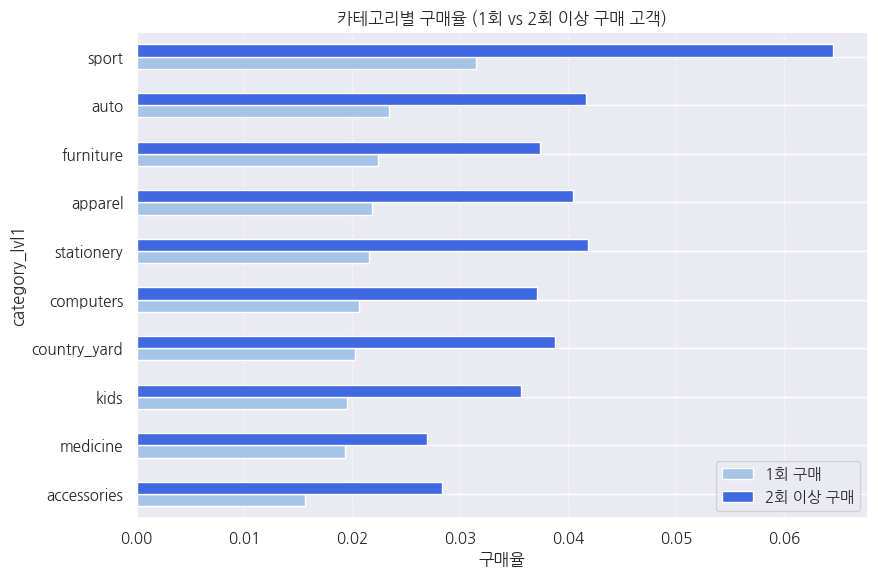

In [ ]:
# ▣ Step 1: 구매 횟수 기반 고객 분리
purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()
one_time_buyers = purchase_counts[purchase_counts == 1].index
multi_buyers = purchase_counts[purchase_counts >= 2].index

# ▣ Step 2: 1회 고객 카테고리별 구매율
category_rate_one = (
    df[df['user_id'].isin(one_time_buyers)]
    .groupby('category_lvl1')['event_type']
    .apply(lambda x: (x == 'purchase').mean())
    .rename('1회 구매')
)

# ▣ Step 3: 2회 이상 고객 카테고리별 구매율
category_rate_multi = (
    df[df['user_id'].isin(multi_buyers)]
    .groupby('category_lvl1')['event_type']
    .apply(lambda x: (x == 'purchase').mean())
    .rename('2회 이상 구매')
)

# ▣ Step 4: 병합
category_rate_compare = pd.concat([category_rate_one, category_rate_multi], axis=1).fillna(0)

# ▣ Step 5: 시각화
category_rate_compare.sort_values('1회 구매', ascending=True).plot(
    kind='barh', figsize=(9, 6), color=['#a6c4e8', '#4068e0']
)
plt.title('카테고리별 구매율 (1회 vs 2회 이상 구매 고객)')
plt.xlabel('구매율')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


📌해석
- 다구매 고객은 Sport가 압도적임
- 1회구매 고객도 Sport가 가장 높지만 많은 차이가 나는거 같진 않음

## 🚩비주력 상품 전환 퍼널 분석

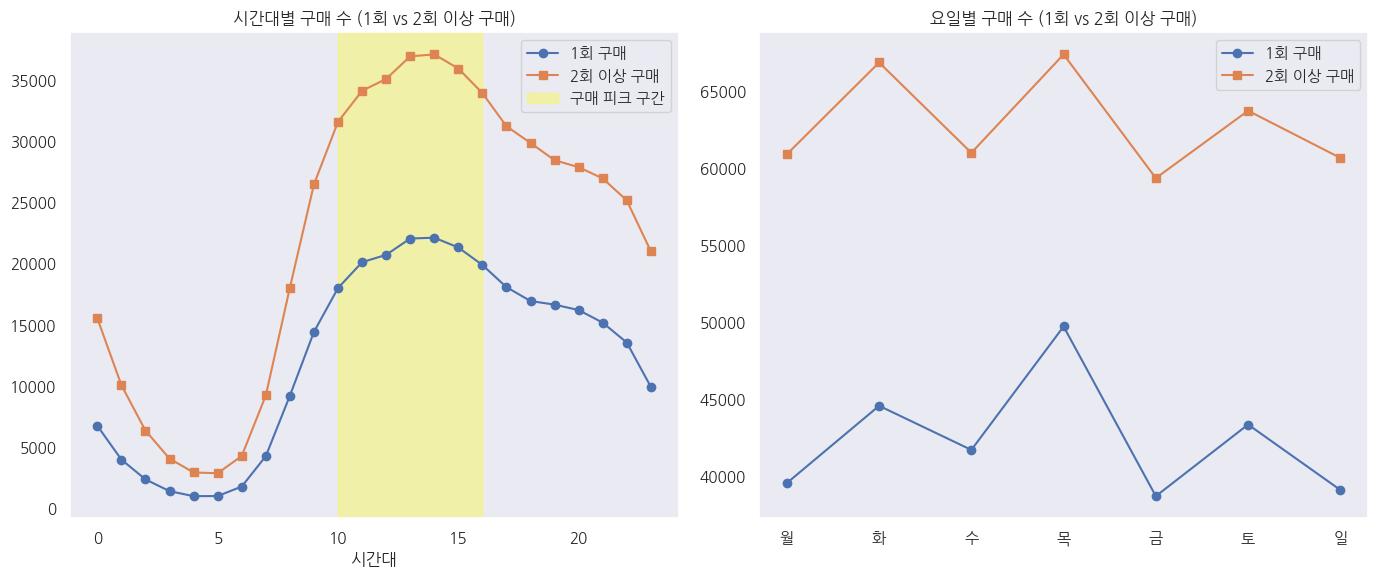

In [ ]:
# ▣ Step 1: 구매 횟수에 따라 고객 분리
purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()
one_time_buyers = purchase_counts[purchase_counts == 1].index
multi_buyers = purchase_counts[purchase_counts >= 2].index

# 시각화
plt.figure(figsize=(14, 6))

# 시간대별 subplot (왼쪽)
plt.subplot(1, 2, 1)

# 각 그룹별 시간대별 구매 수
hourly_one = df[(df['event_type'] == 'purchase') & (df['user_id'].isin(one_time_buyers))].groupby('event_hour')['user_id'].nunique()
hourly_multi = df[(df['event_type'] == 'purchase') & (df['user_id'].isin(multi_buyers))].groupby('event_hour')['user_id'].nunique()

# Plot
plt.plot(hourly_one.index, hourly_one.values, marker='o', label='1회 구매')
plt.plot(hourly_multi.index, hourly_multi.values, marker='s', label='2회 이상 구매')
plt.title('시간대별 구매 수 (1회 vs 2회 이상 구매)')
plt.xlabel('시간대')
plt.grid()
plt.axvspan(10, 16, color='yellow', alpha=0.3, label='구매 피크 구간')
plt.legend()

# 요일별 subplot (오른쪽)
plt.subplot(1, 2, 2)

# 각 그룹별 요일별 구매 수
weekday_one = df[(df['event_type'] == 'purchase') & (df['user_id'].isin(one_time_buyers))].groupby('weekday')['user_id'].nunique()
weekday_multi = df[(df['event_type'] == 'purchase') & (df['user_id'].isin(multi_buyers))].groupby('weekday')['user_id'].nunique()

# 요일 레이블
days = ['월','화','수','목','금','토','일']
x = range(7)

# Plot
plt.plot(x, weekday_one.values, marker='o', label='1회 구매')
plt.plot(x, weekday_multi.values, marker='s', label='2회 이상 구매')
plt.xticks(x, days)
plt.title('요일별 구매 수 (1회 vs 2회 이상 구매)')
plt.grid()
plt.legend()

# ▣ 전체 출력
plt.tight_layout()
plt.show()


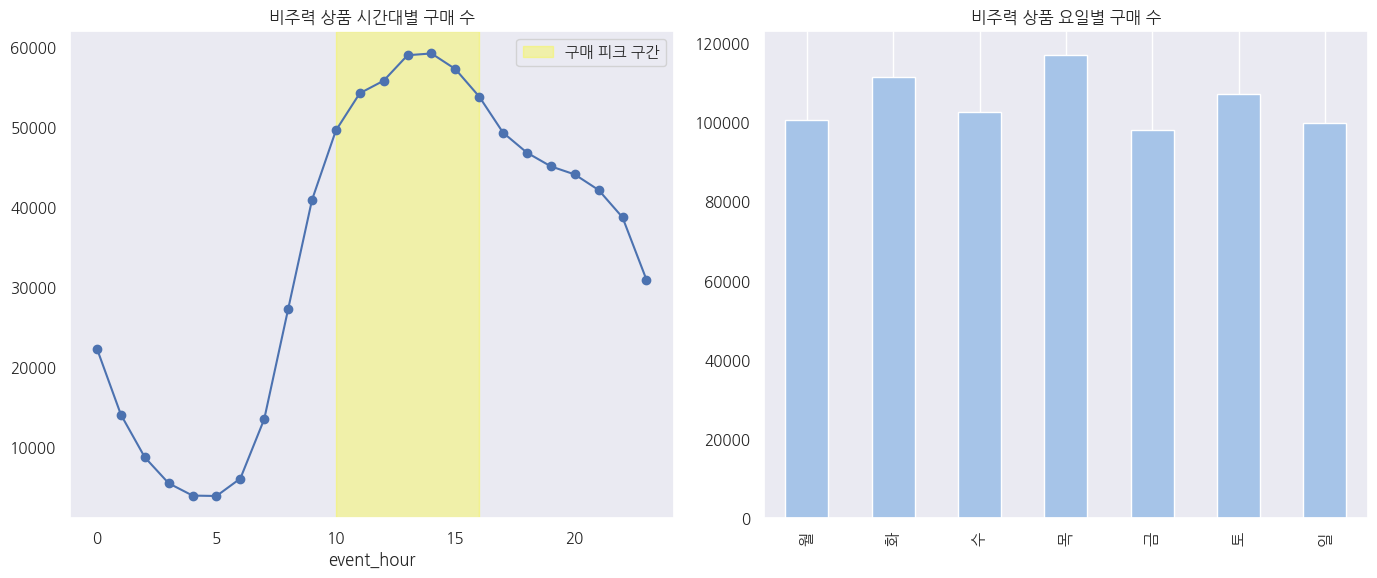

In [ ]:
# figure는 한 번만 선언
plt.figure(figsize=(14, 6))

# ▣ 1. 시간대별 subplot (왼쪽)
plt.subplot(1, 2, 1)
hourly = df[df['event_type'] == 'purchase'].groupby('event_hour')['user_id'].nunique()
plt.plot(hourly.index, hourly.values, marker='o')
plt.title('비주력 상품 시간대별 구매 수')
plt.xlabel('event_hour')
plt.grid()

# ▶ 시간대 강조 (예: 9시 ~ 16시)
plt.axvspan(10, 16, color='yellow', alpha=0.3, label='구매 피크 구간')
plt.legend()

# ▣ 2. 요일별 subplot (오른쪽)
plt.subplot(1, 2, 2)
weekday = df[df['event_type'] == 'purchase'].groupby('weekday')['user_id'].nunique()
weekday.index = ['월','화','수','목','금','토','일']
weekday.plot(kind='bar', color='#a6c4e8')
plt.title('비주력 상품 요일별 구매 수')
plt.grid(axis='y')

# ▣ 전체 출력
plt.tight_layout()
plt.show()


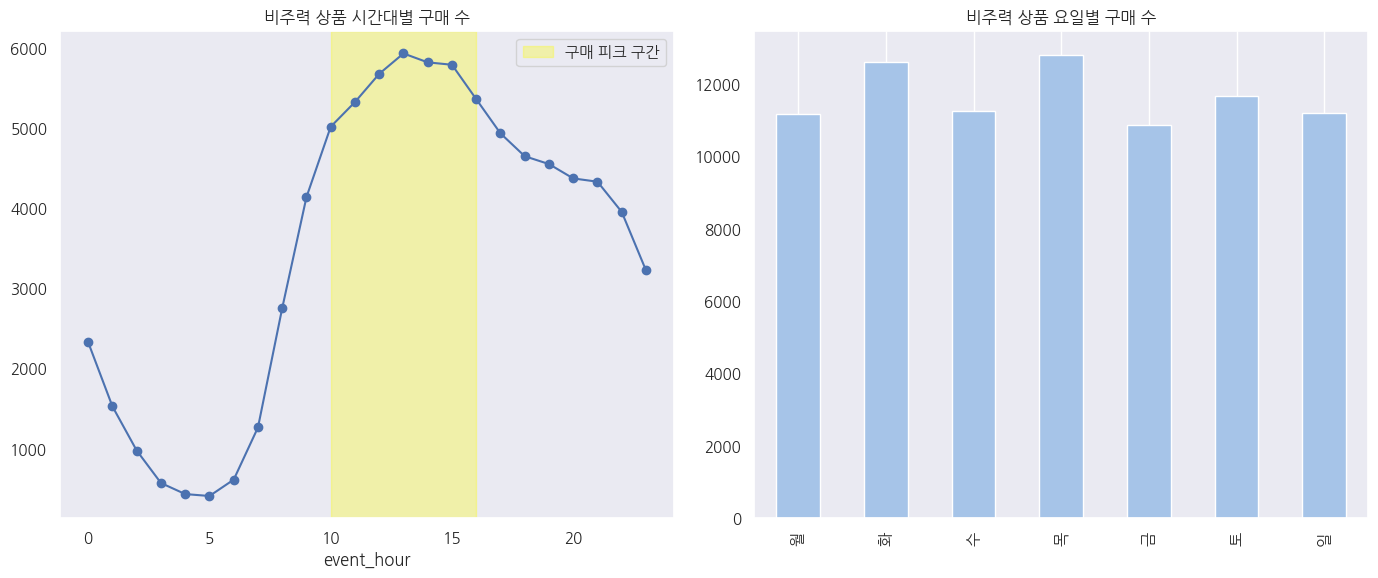

In [ ]:
# figure는 한 번만 선언
plt.figure(figsize=(14, 6))

# ▣ 1. 시간대별 subplot (왼쪽)
plt.subplot(1, 2, 1)
hourly = df_stratified_sample[df_stratified_sample['event_type'] == 'purchase'].groupby('event_hour')['user_id'].nunique()
plt.plot(hourly.index, hourly.values, marker='o')
plt.title('비주력 상품 시간대별 구매 수')
plt.xlabel('event_hour')
plt.grid()

# ▶ 시간대 강조 (예: 9시 ~ 16시)
plt.axvspan(10, 16, color='yellow', alpha=0.3, label='구매 피크 구간')
plt.legend()

# ▣ 2. 요일별 subplot (오른쪽)
plt.subplot(1, 2, 2)
weekday = df_stratified_sample[df_stratified_sample['event_type'] == 'purchase'].groupby('weekday')['user_id'].nunique()
weekday.index = ['월','화','수','목','금','토','일']
weekday.plot(kind='bar', color='#a6c4e8')
plt.title('비주력 상품 요일별 구매 수')
plt.grid(axis='y')

# ▣ 전체 출력
plt.tight_layout()
plt.show()


📌해석
- 비주력 상품 구매 피크 시간대는 10시 ~ 16시 정도임.(주로 낮 시간대에 많이 사는거 같음)
- 요일별로 편차가 있는지 확인했으나 딱히 편차가 없는 것 확인

- 1회 vs 2회이상 구매도 비교했으나 전체적인 양상이 비슷하고 구매수가 기준이기 때문에 당연하게도 2회이상 구매자의 수는 2배가 되어 나옴.

## 🚩비주력 상품별 view 수 확인하기

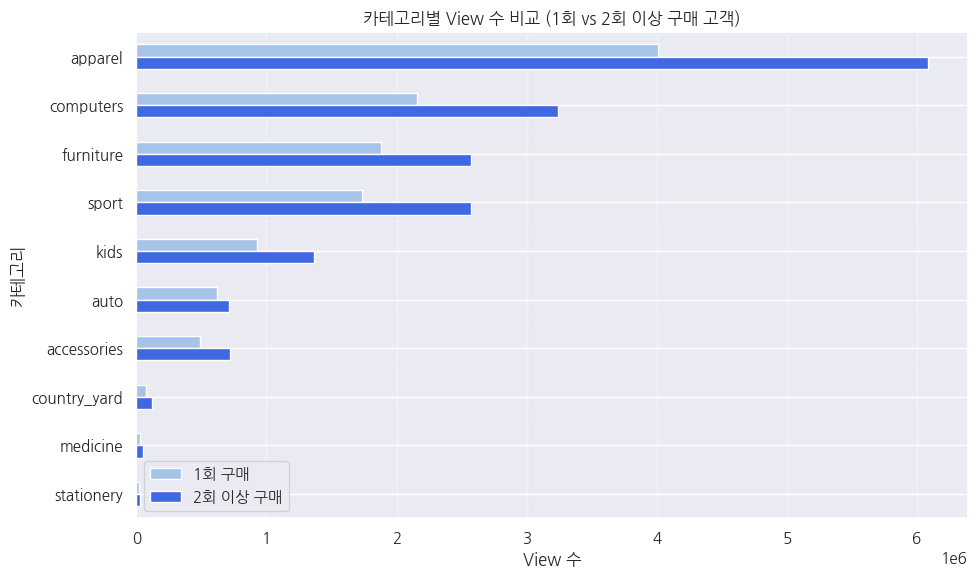

In [ ]:
# 1. 구매 횟수 계산
purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()

# 2. 그룹 분류
one_time_buyers = purchase_counts[purchase_counts == 1].index
multi_buyers    = purchase_counts[purchase_counts >= 2].index

# 1회 구매 고객 view 수
view_counts_one = (
    df[(df['event_type'] == 'view') & (df['user_id'].isin(one_time_buyers))]
    .groupby('category_lvl1')['user_id']
    .count()
)

# 2회 이상 구매 고객 view 수
view_counts_multi = (
    df[(df['event_type'] == 'view') & (df['user_id'].isin(multi_buyers))]
    .groupby('category_lvl1')['user_id']
    .count()
)

# 결합 (빈 카테고리 채우기 위해 outer join)
view_compare = pd.concat(
    [view_counts_one.rename('1회 구매'), view_counts_multi.rename('2회 이상 구매')],
    axis=1
).fillna(0).astype(int).sort_values('1회 구매', ascending=False)

# 막대그래프 그리기
view_compare.plot(kind='barh', figsize=(10, 6), color=['#a6c4e8', '#4068e0'])
plt.title('카테고리별 View 수 비교 (1회 vs 2회 이상 구매 고객)')
plt.xlabel('View 수')
plt.ylabel('카테고리')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

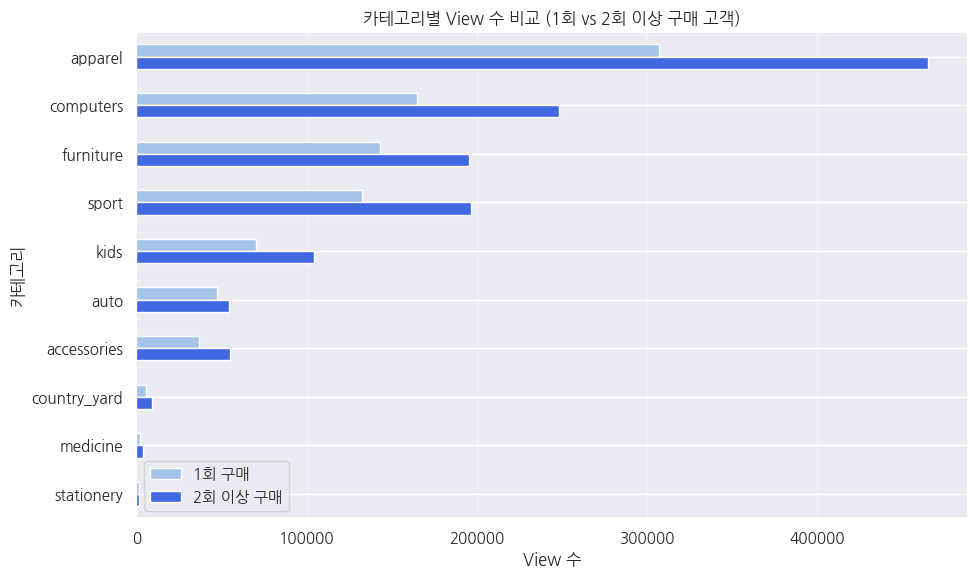

In [ ]:
# 1. 구매 횟수 계산
purchase_counts_2 = df_stratified_sample[df_stratified_sample['event_type'] == 'purchase'].groupby('user_id').size()

# 2. 그룹 분류
one_time_buyers_2 = purchase_counts_2[purchase_counts_2 == 1].index
multi_buyers_2    = purchase_counts_2[purchase_counts_2 >= 2].index

# 1회 구매 고객 view 수
view_counts_one_2 = (
    df_stratified_sample[(df_stratified_sample['event_type'] == 'view') & (df_stratified_sample['user_id'].isin(one_time_buyers))]
    .groupby('category_lvl1')['user_id']
    .count()
)

# 2회 이상 구매 고객 view 수
view_counts_multi_2 = (
    df_stratified_sample[(df_stratified_sample['event_type'] == 'view') & (df_stratified_sample['user_id'].isin(multi_buyers))]
    .groupby('category_lvl1')['user_id']
    .count()
)

# 결합 (빈 카테고리 채우기 위해 outer join)
view_compare_2 = pd.concat(
    [view_counts_one_2.rename('1회 구매'), view_counts_multi_2.rename('2회 이상 구매')],
    axis=1
).fillna(0).astype(int).sort_values('1회 구매', ascending=False)

# 막대그래프 그리기
view_compare_2.plot(kind='barh', figsize=(10, 6), color=['#a6c4e8', '#4068e0'])
plt.title('카테고리별 View 수 비교 (1회 vs 2회 이상 구매 고객)')
plt.xlabel('View 수')
plt.ylabel('카테고리')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

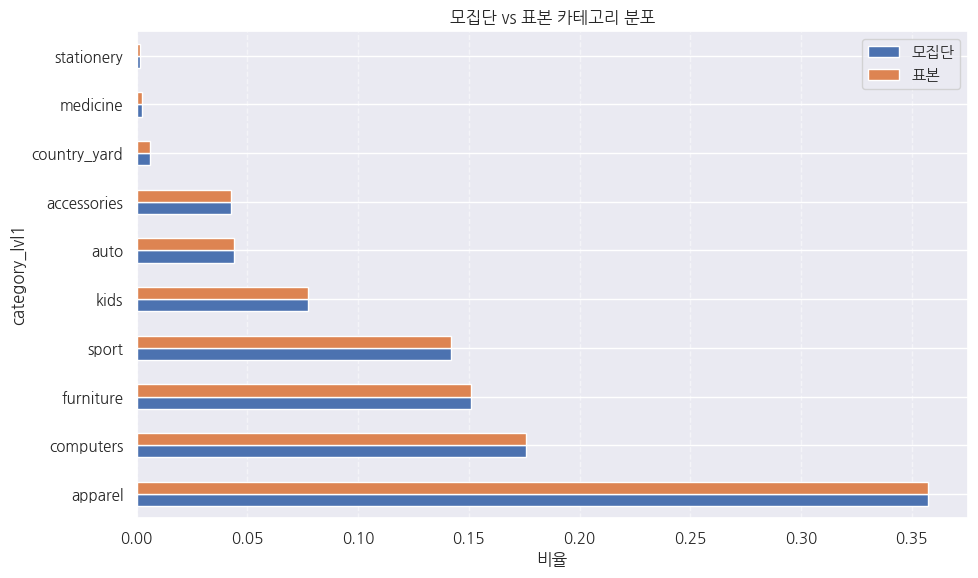

In [ ]:

# 모집단 분포
pop_dist = df['category_lvl1'].value_counts(normalize=True)

# 표본 분포
sample_dist = sampled_df['category_lvl1'].value_counts(normalize=True)

# 비교 시각화
dist_df = pd.DataFrame({
    '모집단': pop_dist,
    '표본': sample_dist
}).fillna(0)

dist_df.plot(kind='barh', figsize=(10, 6), title='모집단 vs 표본 카테고리 분포')
plt.xlabel('비율')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


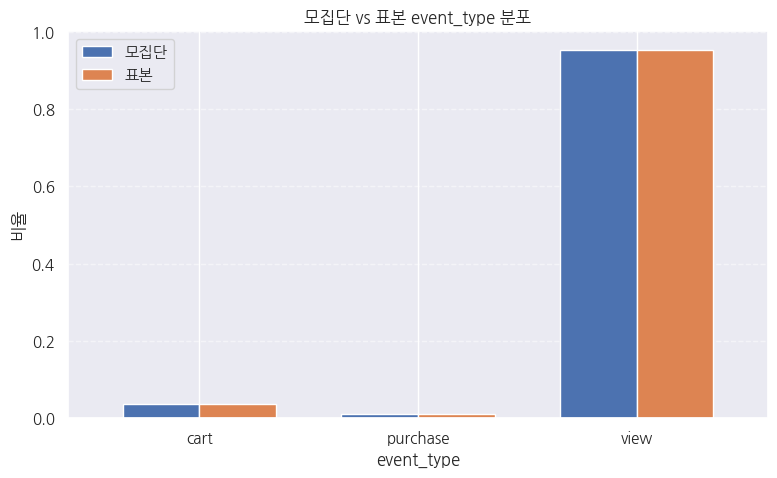

In [ ]:
# ▣ 모집단과 표본의 event_type 비율 계산
pop_event_dist = df['event_type'].value_counts(normalize=True).sort_index()
sample_event_dist = sampled_df['event_type'].value_counts(normalize=True).sort_index()

# ▣ 비교용 데이터프레임 생성
event_dist_df = pd.DataFrame({
    '모집단': pop_event_dist,
    '표본': sample_event_dist
}).fillna(0)

# ▣ 시각화
event_dist_df.plot(kind='bar', figsize=(8, 5), width=0.7)
plt.title('모집단 vs 표본 event_type 분포')
plt.ylabel('비율')
plt.xlabel('event_type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.show()


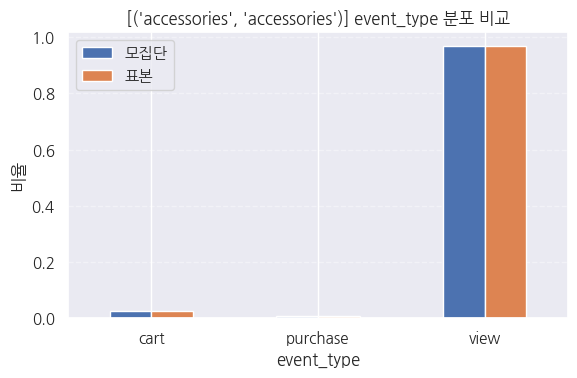

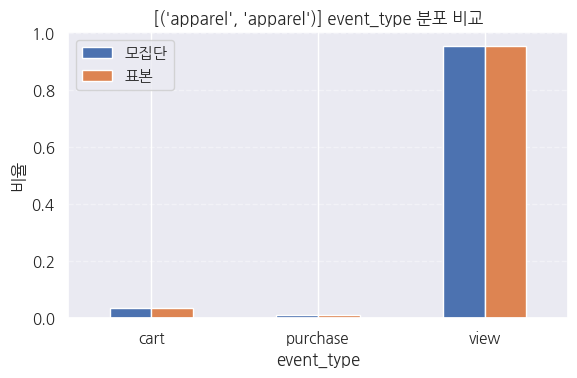

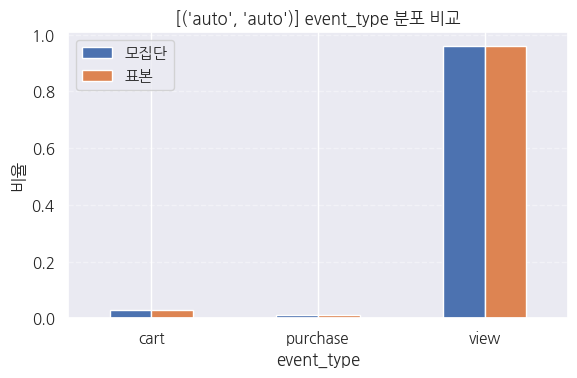

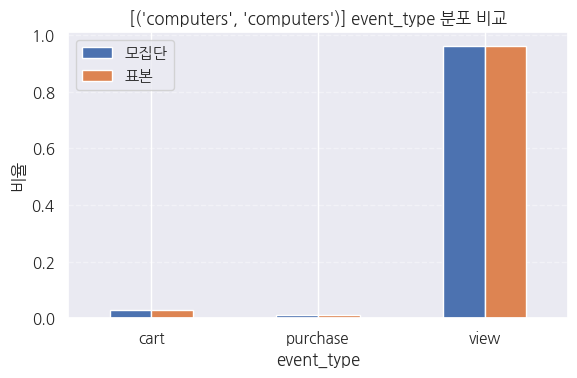

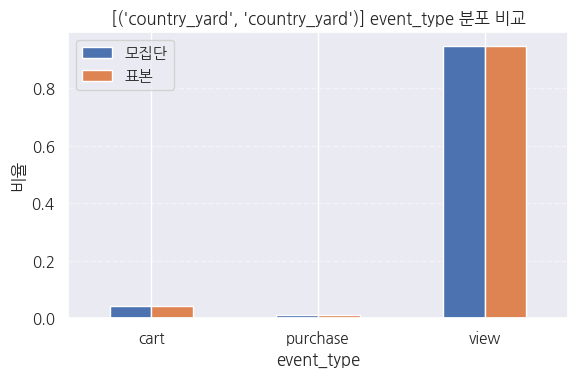

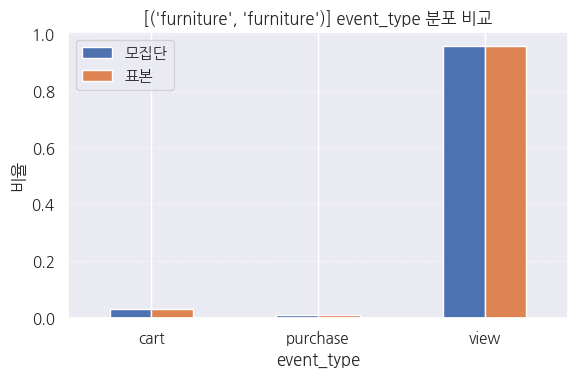

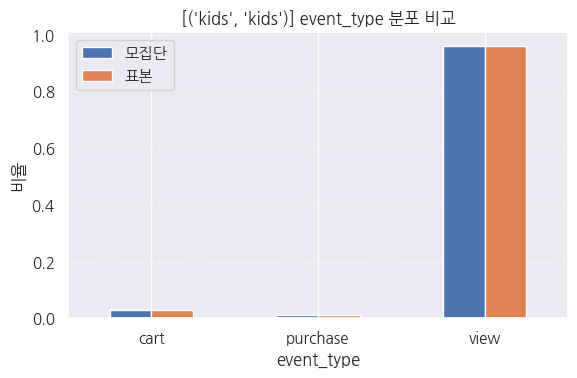

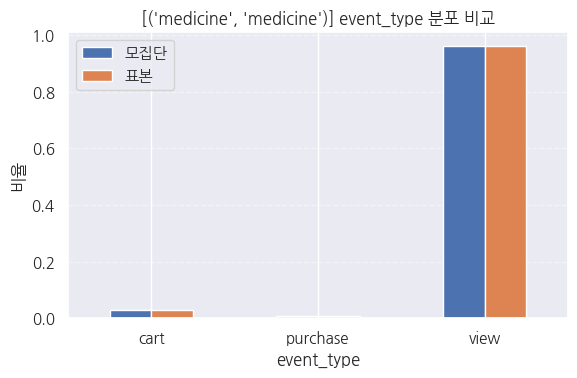

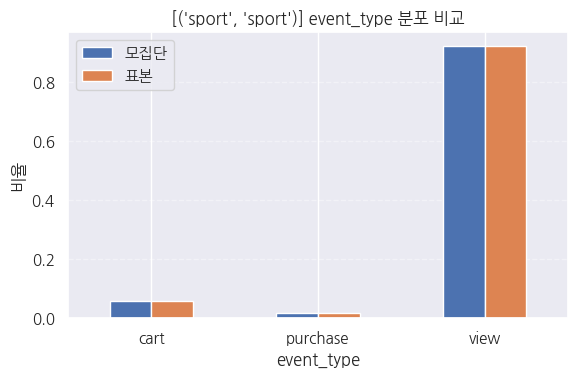

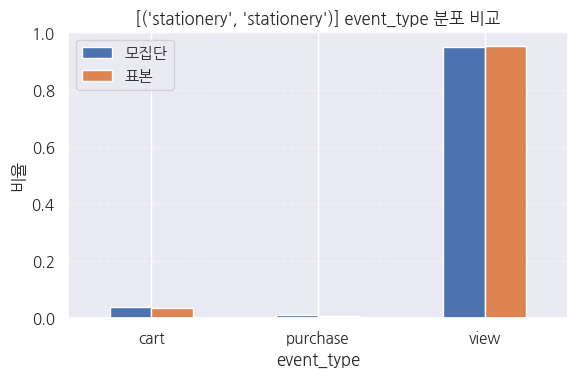

In [ ]:
# ▣ 1. 모집단 분포
pop_ct = (
    df.groupby(['category_lvl1', 'event_type'])['user_id']
    .count()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

# ▣ 2. 표본 분포
sample_ct = (
    sampled_df.groupby(['category_lvl1', 'event_type'])['user_id']
    .count()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

# ▣ 3. 카테고리별 event_type 분포 시각화
categories = pop_ct.index

for cat in categories:
    df_plot = pd.DataFrame({
        '모집단': pop_ct.loc[cat],
        '표본': sample_ct.loc[cat]
    })

    df_plot.plot(kind='bar', figsize=(6, 4), title=f"[{cat}] event_type 분포 비교")
    plt.ylabel('비율')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


📌 해석
- 구매율은 Sport가 가장 높았지만 고객이 가장 많이 보는 카테고리는 apparel임

## 🚩비주력 상품

In [ ]:
# 고객 분리 (1회 구매 vs 2회 이상)
purchase_counts = sampled_df[sampled_df['event_type'] == 'purchase'].groupby('user_id').size()
one_time_buyers = purchase_counts[purchase_counts == 1].index
multi_buyers = purchase_counts[purchase_counts >= 2].index

df_one = sampled_df[sampled_df['user_id'].isin(one_time_buyers)].copy()
df_multi = sampled_df[sampled_df['user_id'].isin(multi_buyers)].copy()

## 🔎 1회 구매 고객 vs 다회 구매 고객 event 비중 비교

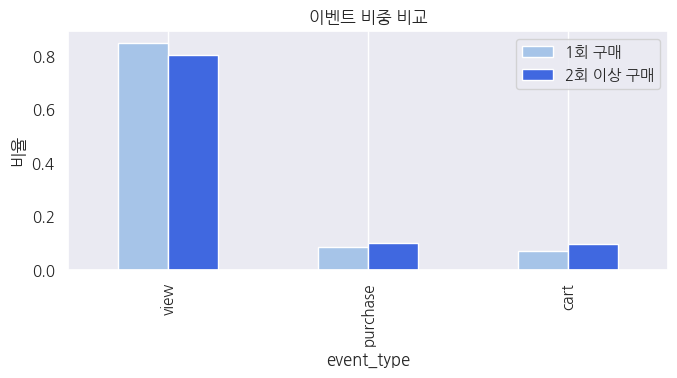

In [ ]:
event_ratio = pd.DataFrame({
    '1회 구매': df_one['event_type'].value_counts(normalize=True),
    '2회 이상 구매': df_multi['event_type'].value_counts(normalize=True)
}).fillna(0)

event_ratio.plot(kind='bar', figsize=(7, 4), color=['#a6c4e8', '#4068e0'])
plt.title('이벤트 비중 비교')
plt.ylabel('비율')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

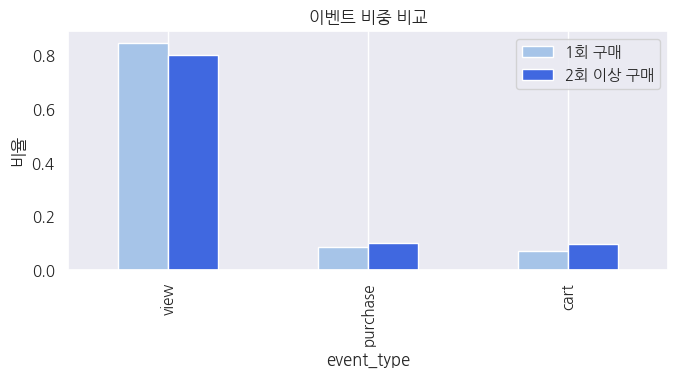

In [ ]:
event_ratio = pd.DataFrame({
    '1회 구매': df_one['event_type'].value_counts(normalize=True),
    '2회 이상 구매': df_multi['event_type'].value_counts(normalize=True)
}).fillna(0)

event_ratio.plot(kind='bar', figsize=(7, 4), color=['#a6c4e8', '#4068e0'])
plt.title('이벤트 비중 비교')
plt.ylabel('비율')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

📌 해석
- view에서는 1회 구매자가 조금 더 높은데 딱히 유의미한 차이는 아닌거 같음
- 1회 구매 고객이 cart에 담는 비율이 높은건 아니지만 2회 구매 고객과 비교했을때 꽤 담는 것을 알수 있고, 구매로 이어지는 비율이 매우 적다는 것을 확인할 수 있음

## 🔎1회 구매 고객 vs 다회 구매 고객 구매까지 걸린 시간분포 확인

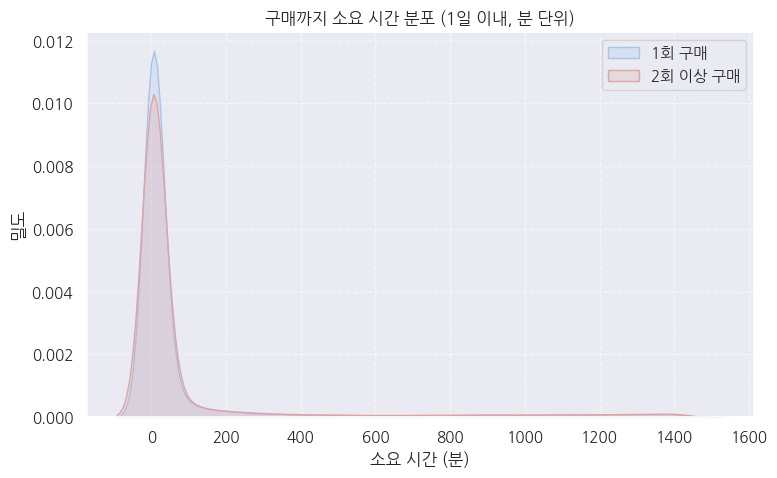

In [ ]:
# 구매 횟수 기준으로 고객 분리
purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()
one_time_buyers = purchase_counts[purchase_counts == 1].index
multi_buyers = purchase_counts[purchase_counts >= 2].index

df_one = df[df['user_id'].isin(one_time_buyers)]
df_multi = df[df['user_id'].isin(multi_buyers)]

# 함수: view → purchase까지 소요 시간 (분 단위)
def compute_time_to_purchase(df_group):
    view_time = df_group[df_group['event_type'] == 'view'].groupby('user_id')['event_time'].min()
    purchase_time = df_group[df_group['event_type'] == 'purchase'].groupby('user_id')['event_time'].min()
    df_time = pd.merge(view_time, purchase_time, on='user_id', how='inner', suffixes=('_view', '_purchase'))
    df_time['diff_min'] = (df_time['event_time_purchase'] - df_time['event_time_view']).dt.total_seconds() / 60
    return df_time['diff_min']

# 각 그룹별 소요 시간 계산
time_one = compute_time_to_purchase(df_one)
time_multi = compute_time_to_purchase(df_multi)

# ▣ 1. 음수 제거 (view보다 purchase가 먼저인 오류 제거)
time_one = time_one[time_one > 0]
time_multi = time_multi[time_multi > 0]

# ▣ 2. 극단치 제거 (1일 = 1440분 이하만 남김)
time_one = time_one[time_one <= 1440]
time_multi = time_multi[time_multi <= 1440]

# ▣ 3. KDE 시각화
plt.figure(figsize=(8, 5))
sns.kdeplot(time_one, label='1회 구매', fill=True, color='#a6c4e8')
sns.kdeplot(time_multi, label='2회 이상 구매', fill=True, color='#e0a3a3')
plt.title('구매까지 소요 시간 분포 (1일 이내, 분 단위)')
plt.xlabel('소요 시간 (분)')
plt.ylabel('밀도')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
print(f"1회 구매 평균 소요시간: {time_one.mean():.1f}분 / 중앙값: {time_one.median():.1f}분")
print(f"2회 이상 구매 평균 소요시간: {time_multi.mean():.1f}분 / 중앙값: {time_multi.median():.1f}분")

1회 구매 평균 소요시간: 99.8분 / 중앙값: 5.5분
2회 이상 구매 평균 소요시간: 107.2분 / 중앙값: 4.8분


## 🔎 1회 구매고객 vs 2회 이상 구매고객 행동패턴 확인

In [ ]:
seq_one = df_one.sort_values(['user_id','event_time']).groupby('user_id')['event_type'].apply(list)
seq_multi = df_multi.sort_values(['user_id','event_time']).groupby('user_id')['event_type'].apply(list)

top_seq_one = Counter(tuple(seq) for seq in seq_one).most_common(5)
top_seq_multi = Counter(tuple(seq) for seq in seq_multi).most_common(5)

print("1회 구매 고객 Top 시퀀스:")
for i, (seq, cnt) in enumerate(top_seq_one, 1):
    print(f"{i}. {seq} → {cnt}명")

print("\n2회 이상 구매 고객 Top 시퀀스:")
for i, (seq, cnt) in enumerate(top_seq_multi, 1):
    print(f"{i}. {seq} → {cnt}명")


1회 구매 고객 Top 시퀀스:
1. ('view', 'cart', 'purchase', 'view') → 8858명
2. ('view', 'cart', 'purchase') → 7003명
3. ('view', 'view', 'cart', 'purchase', 'view') → 3841명
4. ('view', 'view', 'cart', 'purchase') → 3195명
5. ('view', 'cart', 'purchase', 'view', 'view') → 2790명

2회 이상 구매 고객 Top 시퀀스:
1. ('view', 'cart', 'purchase', 'view', 'view', 'cart', 'purchase', 'view') → 568명
2. ('view', 'cart', 'purchase', 'purchase', 'view') → 557명
3. ('view', 'cart', 'purchase', 'purchase') → 428명
4. ('view', 'cart', 'purchase', 'view', 'cart', 'purchase') → 375명
5. ('view', 'cart', 'purchase', 'view', 'cart', 'purchase', 'view') → 359명


In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 05:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,5,furniture,living_room,sofa,None,Tuesday
1,2019-10-01 05:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,5,computers,notebook,None,None,Tuesday
2,2019-10-01 05:00:05,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01,5,computers,desktop,None,None,Tuesday
3,2019-10-01 05:00:10,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01,5,apparel,shoes,keds,None,Tuesday
4,2019-10-01 05:00:16,view,13500240,2053013557099889147,furniture.bedroom.bed,brw,93.18,555446365,7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4,2019-10-01,5,furniture,bedroom,bed,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98131528,2020-03-31 23:59:58,view,100172862,2232732114124538702,apparel.shoes,rooman,71.82,626088076,77472822-64b5-4000-a1e3-b757b4244466,2020-03-31,23,apparel,shoes,None,None,Tuesday
98131529,2020-03-31 23:59:58,view,7202279,2232732084546306225,furniture.living_room.chair,None,9.52,634136524,f0d03600-507a-4f26-b4e0-67aa1fa2c6c2,2020-03-31,23,furniture,living_room,chair,None,Tuesday
98131530,2020-03-31 23:59:58,view,9200473,2232732104343421549,apparel.scarf,ritmix,7.00,630903806,267c010f-8dbd-4cd4-8816-f4ffea502d73,2020-03-31,23,apparel,scarf,None,None,Tuesday
98131531,2020-03-31 23:59:59,view,15500139,2232732108319621820,apparel.underwear,flight,73.36,517441190,ac227671-933a-43f8-b057-f70df41f2dd7,2020-03-31,23,apparel,underwear,None,None,Tuesday


In [ ]:
test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/주력상품/multi_buyers_all_events.parquet')
test2 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/주력상품/one_time_buyers_all_events.parquet')
test



,event_type,product_id,category_id,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,view,1004739,2053013555631882655,xiaomi,197.55,519530528,9882d21f-2c5f-496b-90d4-a1503edb6562,2019-10-01,5,electronics,smartphone,None,None,Tuesday
1,view,1004767,2053013555631882655,samsung,254.82,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed,2019-10-01,5,electronics,smartphone,None,None,Tuesday
2,view,1003141,2053013555631882655,apple,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da,2019-10-01,5,electronics,smartphone,None,None,Tuesday
3,view,1005105,2053013555631882655,apple,1415.48,529755884,0b828fb6-99bd-4d26-beb3-3021f5d6102c,2019-10-01,5,electronics,smartphone,None,None,Tuesday
4,view,1004659,2053013555631882655,samsung,787.18,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed,2019-10-01,5,electronics,smartphone,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53878062,view,1401649,2053013563835941749,hp,1588.80,540315194,276ffb89-f24c-4c49-97a6-f0bb2292946b,2020-03-31,23,appliances,kitchen,refrigerators,None,Tuesday
53878063,view,100077607,2232732101063475749,vitek,100.36,633281427,a44da407-c3a0-435b-8c88-bca584ef75c7,2020-03-31,23,appliances,environment,vacuum,None,Tuesday
53878064,view,34900071,2232732087834640627,weber,141.57,519495070,18111012-3d2d-492d-9083-388c683c85a3,2020-03-31,23,appliances,kitchen,grill,None,Tuesday
53878065,view,3100828,2232732091391410500,bosch,102.94,539712971,c7a7720b-8e46-4bb1-9463-fbc36c0840fb,2020-03-31,23,appliances,kitchen,blender,None,Tuesday


In [ ]:
test.to_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/주력상품/multi_buyers_all_events.csv', index=False)
test2.to_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/주력상품/one_time_buyers_all_events.csv', index=False)

In [ ]:
tmp = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/top3_categories.parquet')
tmp

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,5,appliances,environment,water_heater,None,Tuesday
1,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,5,electronics,smartphone,None,None,Tuesday
2,2019-10-01 00:00:11+00:00,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb,2019-10-01,5,electronics,smartphone,None,None,Tuesday
3,2019-10-01 00:00:11+00:00,view,2900536,2053013554776244595,appliances.kitchen.microwave,elenberg,51.46,555158050,b5bdd0b3-4ca2-4c55-939e-9ce44bb50abd,2019-10-01,5,appliances,kitchen,microwave,None,Tuesday
4,2019-10-01 00:00:11+00:00,view,1005011,2053013555631882655,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101,2019-10-01,5,electronics,smartphone,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188464725,2020-03-31 18:59:59+00:00,view,1004225,2232732093077520756,construction.tools.light,apple,1104.28,512572600,3a243e5a-d4a3-4cf1-afae-a671c7f37cd4,2020-03-31,23,construction,tools,light,None,Tuesday
188464726,2020-03-31 18:59:59+00:00,view,5701087,2053013554415534427,electronics.video.tv,jvc,56.63,561157123,1d4320ed-aa16-4196-8129-b59bb7bce726,2020-03-31,23,electronics,video,tv,None,Tuesday
188464727,2020-03-31 18:59:59+00:00,view,100132075,2053013554658804075,electronics.audio.headphone,lenovo,566.27,616307331,774c99a4-8fdd-44a3-ae2e-e6a1b4f6a2ee,2020-03-31,23,electronics,audio,headphone,None,Tuesday
188464728,2020-03-31 18:59:59+00:00,view,100010158,2053013563835941749,appliances.kitchen.refrigerators,pulser,363.41,625382291,bcd82fde-b570-45e9-83f6-a8fc1579a40f,2020-03-31,23,appliances,kitchen,refrigerators,None,Tuesday


In [ ]:
tmp['event_type'].value_counts()

,count
event_type,
view,44406705
cart,6111828
purchase,3359534


In [ ]:
# 📌 전제: df에는 전체 이벤트가 담겨 있고,
# event_type은 ['view', 'cart', 'purchase'] 중 하나

# 1. 구매 횟수 2회 이상 고객 ID 추출
purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()
multi_buyers = purchase_counts[purchase_counts >= 2].index

# 2. 해당 고객의 전체 이벤트 중 view만 있는 row 수 추출
multi_df = df[df['user_id'].isin(multi_buyers)]

# 3. user_id 기준으로 해당 고객의 event_type set 만들기
user_event_set = multi_df.groupby('user_id')['event_type'].apply(set)

# 4. view만 존재하는 고객만 필터링
only_view_users = user_event_set[user_event_set.apply(lambda x: x == {'view'})].index

# 5. 이 고객들이 남긴 view 이벤트 수
only_view_events = multi_df[(multi_df['user_id'].isin(only_view_users)) & (multi_df['event_type'] == 'view')]

# 결과 출력
print(f"2회 이상 구매 고객 중 cart나 purchase 없이 'view'만 한 이벤트 수: {len(only_view_events)}건")

2회 이상 구매 고객 중 cart나 purchase 없이 'view'만 한 이벤트 수: 0건


## 층화샘플링(비주력상품)

In [ ]:
# ▣ 1. 목표 수
target_total_rows = 7_500_000

# ▣ 2. 카테고리별 비율
category_counts = df['category_lvl1'].value_counts()
category_ratio = category_counts / category_counts.sum()

# ▣ 3. 샘플 수 계산 (우선 내림 처리)
raw_sizes = (category_ratio * target_total_rows)
category_sample_sizes = np.floor(raw_sizes).astype(int)

# ▣ 4. 초과 부족 계산
gap = target_total_rows - category_sample_sizes.sum()

# ▣ 5. 소수점 큰 순서대로 추가 배정
remainder = (raw_sizes - category_sample_sizes).sort_values(ascending=False)

for cat in remainder.index[:gap]:
    category_sample_sizes[cat] += 1

# ▣ 6. 샘플링
sampled_list = []
for cat, n in category_sample_sizes.items():
    df_cat = df[df['category_lvl1'] == cat]
    n_sample = min(n, len(df_cat))
    df_sampled = df_cat.sample(n=n_sample, random_state=42)
    sampled_list.append(df_sampled)

df_stratified_sample = pd.concat(sampled_list).reset_index(drop=True)

# ▣ 7. 확인
print(f"최종 샘플 수: {len(df_stratified_sample):,}개")

최종 샘플 수: 7,500,000개


In [ ]:
df_stratified_sample

In [ ]:
df_stratified_sample.to_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/non_categories_750.csv', index=False)

## 주력상품 층화샘플링

In [ ]:
# ① 문자열이면 datetime으로 변환 (UTC 기준)
tmp['event_time'] = pd.to_datetime(tmp['event_time'], utc=True)

# ② GMT+5로 시간대 변환 (Etc/GMT-5 = GMT+5)
tmp['event_time'] = tmp['event_time'].dt.tz_convert('Etc/GMT-5')

# ③ 시간대 정보 제거 → datetime64[ns]로 변환 (시분초 포함)
tmp['event_time'] = tmp['event_time'].dt.tz_localize(None)
tmp

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 05:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,5,appliances,environment,water_heater,None,Tuesday
1,2019-10-01 05:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,5,electronics,smartphone,None,None,Tuesday
2,2019-10-01 05:00:11,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb,2019-10-01,5,electronics,smartphone,None,None,Tuesday
3,2019-10-01 05:00:11,view,2900536,2053013554776244595,appliances.kitchen.microwave,elenberg,51.46,555158050,b5bdd0b3-4ca2-4c55-939e-9ce44bb50abd,2019-10-01,5,appliances,kitchen,microwave,None,Tuesday
4,2019-10-01 05:00:11,view,1005011,2053013555631882655,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101,2019-10-01,5,electronics,smartphone,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188464725,2020-03-31 23:59:59,view,1004225,2232732093077520756,construction.tools.light,apple,1104.28,512572600,3a243e5a-d4a3-4cf1-afae-a671c7f37cd4,2020-03-31,23,construction,tools,light,None,Tuesday
188464726,2020-03-31 23:59:59,view,5701087,2053013554415534427,electronics.video.tv,jvc,56.63,561157123,1d4320ed-aa16-4196-8129-b59bb7bce726,2020-03-31,23,electronics,video,tv,None,Tuesday
188464727,2020-03-31 23:59:59,view,100132075,2053013554658804075,electronics.audio.headphone,lenovo,566.27,616307331,774c99a4-8fdd-44a3-ae2e-e6a1b4f6a2ee,2020-03-31,23,electronics,audio,headphone,None,Tuesday
188464728,2020-03-31 23:59:59,view,100010158,2053013563835941749,appliances.kitchen.refrigerators,pulser,363.41,625382291,bcd82fde-b570-45e9-83f6-a8fc1579a40f,2020-03-31,23,appliances,kitchen,refrigerators,None,Tuesday


In [ ]:
# ▣ 1. 목표 수
target_total_rows_2 = 7_500_000

# ▣ 2. 카테고리별 비율
category_counts_2 = tmp['category_lvl1'].value_counts()
category_ratio_2 = category_counts_2 / category_counts_2.sum()

# ▣ 3. 샘플 수 계산 (우선 내림 처리)
raw_sizes_2 = (category_ratio_2 * target_total_rows_2)
category_sample_sizes_2 = np.floor(raw_sizes_2).astype(int)

# ▣ 4. 초과 부족 계산
gap_2 = target_total_rows_2 - category_sample_sizes_2.sum()

# ▣ 5. 소수점 큰 순서대로 추가 배정
remainder_2 = (raw_sizes_2 - category_sample_sizes_2).sort_values(ascending=False)

for cat_2 in remainder_2.index[:gap_2]:
    category_sample_sizes_2[cat_2] += 1

# ▣ 6. 샘플링
sampled_list_2 = []
for cat_2, n in category_sample_sizes_2.items():
    df_cat_2 = tmp[tmp['category_lvl1'] == cat_2]
    n_sample_2 = min(n, len(df_cat_2))
    df_sampled_2 = df_cat_2.sample(n=n_sample_2, random_state=42)
    sampled_list_2.append(df_sampled_2)

df_stratified_sample_2 = pd.concat(sampled_list_2).reset_index(drop=True)

# ▣ 7. 확인
print(f"최종 샘플 수: {len(df_stratified_sample_2):,}개")

최종 샘플 수: 7,500,000개


In [ ]:
df_stratified_sample_2

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-12-24 07:25:30,view,1004565,2232732093077520756,construction.tools.light,huawei,153.92,515069331,d649f3ae-1529-4697-b76e-d7ec8b275bb5,2019-12-24,7,construction,tools,light,None,Tuesday
1,2020-03-04 16:00:33,view,100033708,2232732093077520756,construction.tools.light,xiaomi,280.57,581460657,09c5f0ee-94f0-457d-86c4-269782f99155,2020-03-04,16,construction,tools,light,None,Wednesday
2,2020-02-09 17:29:22,view,1004873,2232732093077520756,construction.tools.light,samsung,321.40,535624989,5ec12604-3e0e-4492-81c2-eb7a0943567c,2020-02-09,17,construction,tools,light,None,Sunday
3,2020-03-22 15:37:21,view,1002544,2232732093077520756,construction.tools.light,apple,417.00,631366395,0ba211ea-18a3-454d-82eb-6d9f5a1df125,2020-03-22,15,construction,tools,light,None,Sunday
4,2020-02-24 00:00:37,view,1005228,2232732093077520756,construction.tools.light,honor,282.86,535375737,2fc90b21-45a4-42ab-93cd-b93351c243a1,2020-02-24,0,construction,tools,light,None,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7499995,2019-10-30 21:10:37,view,2701646,2053013563911439225,appliances.kitchen.refrigerators,indesit,268.52,529067039,cf08eb23-bc12-4851-bfbd-1f9f8ee47331,2019-10-30,21,appliances,kitchen,refrigerators,None,Wednesday
7499996,2019-12-31 21:23:11,view,3601343,2232732092297380188,appliances.kitchen.washer,samsung,437.57,558521374,76f97a8a-0c49-4db2-ba14-f96b01e7b0ef,2019-12-31,21,appliances,kitchen,washer,None,Tuesday
7499997,2019-11-11 12:18:55,view,6301417,2053013554834964853,appliances.kitchen.kettle,tefal,61.75,515707501,1e6efa6c-684b-46fc-ac97-a512bb3f654e,2019-11-11,12,appliances,kitchen,kettle,None,Monday
7499998,2019-12-09 20:17:40,view,2701683,2232732091718566220,appliances.kitchen.refrigerators,beko,229.07,584344472,e3f33659-7b6b-4079-8750-b5cfdf8ef2a0,2019-12-09,20,appliances,kitchen,refrigerators,None,Monday


In [ ]:
df_stratified_sample_2.to_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/top3_categories_750.csv', index=False)

In [ ]:
df_stratified_sample['event_type'].value_counts()

,count
event_type,
view,14291690
cart,534144
purchase,174166


## 🎲 비주력 상품 랜덤 샘플링

In [ ]:
# ▣ 1. 설정값
target_sample_size = 15_000_000   # 1,500만개 이하
seed = 42                         # 필요시 이 값만 바꿔주면 됨

# ▣ 2. 실제 데이터 수가 더 작으면 전체 사용
n_rows = min(target_sample_size, len(df))

# ▣ 3. 랜덤 샘플링
sampled_df = df.sample(n=n_rows, random_state=seed)

# ▣ 4. 결과 확인
print(f"[✔️ 랜덤 시드 {seed}] 샘플링 완료 - 추출 행 수: {len(sampled_df):,}개")

# ▣ 5. (선택) 샘플 요약
print("\n[샘플 요약]")
print(sampled_df['category_lvl1'].value_counts(normalize=True).head(5))

[✔️ 랜덤 시드 42] 샘플링 완료 - 추출 행 수: 15,000,000개

[샘플 요약]
category_lvl1
apparel      0.357206
computers    0.175790
furniture    0.151017
sport        0.141949
kids         0.077278
Name: proportion, dtype: float64


In [ ]:
sampled_df.to_parquet(f'/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/랜덤샘플링/non_sample_seed_{seed}.parquet', index=False)

## 🎲 주력상품 랜덤 샘플링

In [ ]:
# ▣ 1. 설정값
target_sample_size_2 = 15_000_000   # 1,500만개 이하
seed_2 = 42                         # 필요시 이 값만 바꿔주면 됨

# ▣ 2. 실제 데이터 수가 더 작으면 전체 사용
n_rows_2 = min(target_sample_size, len(df))

# ▣ 3. 랜덤 샘플링
sampled_df_2 = tmp.sample(n=n_rows, random_state=seed)

# ▣ 4. 결과 확인
print(f"[✔️ 랜덤 시드 {seed_2}] 샘플링 완료 - 추출 행 수: {len(sampled_df_2):,}개")

# ▣ 5. (선택) 샘플 요약
print("\n[샘플 요약]")
print(sampled_df_2['category_lvl1'].value_counts(normalize=True).head(5))


[✔️ 랜덤 시드 42] 샘플링 완료 - 추출 행 수: 15,000,000개

[샘플 요약]
category_lvl1
construction    0.367721
electronics     0.352536
appliances      0.279743
Name: proportion, dtype: float64


In [ ]:
sampled_df_2.to_parquet(f'/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/랜덤샘플링/top3_sample_seed_{seed}.parquet', index=False)